In [1]:
import numpy as np
import pandas as pd
import time
import threading
import random as r
import matplotlib.pyplot as plt

In [2]:
def generate_random_matrices(n, size):
    matrices = []
    for _ in range(n):
        matrices.append(np.random.rand(size, size))
    return matrices

def multiply_matrices(matrices):
    constant_matrix = np.random.rand(matrix_size, matrix_size)
    result = constant_matrix.copy()
    for matrix in matrices:
        result = np.dot(result, matrix)
    return result

def perform_multiplication_with_threads(num_threads):
    start_time = time.time()
    threads = []
    for i in range(0, len(matrices), num_threads):
        thread = threading.Thread(target=multiply_matrices, args=(matrices[i:i+num_threads],))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

In [3]:
num_matrices = 100
matrix_size = 1000
matrices=generate_random_matrices(num_matrices,matrix_size)

In [5]:
# Get the number of CPU cores
import multiprocessing
num_cores = multiprocessing.cpu_count()

In [6]:
# Perform multiplication with different numbers of threads
results = {}
for num_threads in range(1, num_cores + 1):
    time_taken = perform_multiplication_with_threads(num_threads)
    results[num_threads] = time_taken

In [13]:
# Create DataFrame
df = pd.DataFrame.from_dict(results, orient='index', columns=['Time Taken (s)'])
df.index.name = 'Threads'
print(df)

         Time Taken (s)
Threads                
1              3.491341
2              2.895932
3              2.407792
4              2.411173
5              2.325766
6              2.589267
7              2.818174
8              2.593228


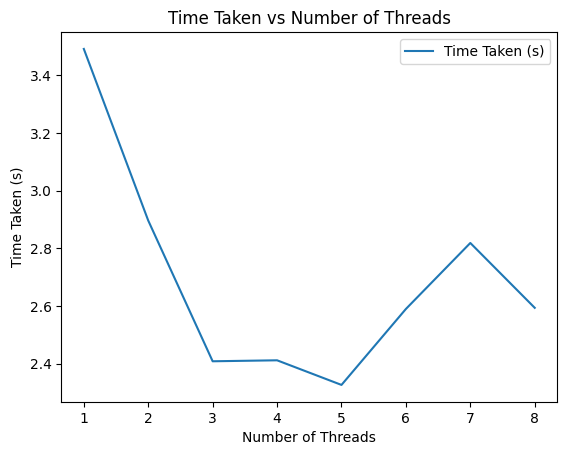

In [14]:
# Plot
df.plot()
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Number of Threads')
plt.show()